In [1]:
# import
import os
import numpy as np
import scipy as sp
from scipy import stats
from sklearn.cluster import KMeans

# import plotting libraries
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 10})
plt.rcParams['svg.fonttype'] = 'none'
import seaborn as sns
from nilearn import datasets
from nilearn import plotting

# import network_control functions
from network_control.energies import ComputeControlEnergy, integrate_u
from network_control.energies import optimal_input as get_control_inputs
from network_control.metrics import ave_control
from network_control.utils import matrix_normalization, convert_states_str2float, normalize_state
from network_control.plotting import roi_to_vtx

In [2]:
# directory where data is stored
datadir = '/Users/lindenmp/Google-Drive-Penn/work/research_projects/control_package/data'
resultsdir = '/Users/lindenmp/Google-Drive-Penn/work/research_projects/control_package/results'
A_file = 'pnc_schaefer200_Am.npy'

In [3]:
# load A matrix
A = np.load(os.path.join(datadir, A_file))
n_nodes = A.shape[0]
print(A.shape)

(200, 200)


In [4]:
# normalize
A[np.eye(A.shape[0]).astype(bool)] = 0
# version = 'discrete'
version = 'continuous'
A_norm = matrix_normalization(A, version=version, c=1)

In [5]:
# compute average controllability
ac = ave_control(A_norm, version=version)

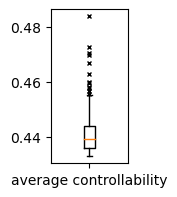

In [6]:
# plot distribution of values
f, ax = plt.subplots(figsize=(1, 2))
ax.boxplot(ac, flierprops={'marker': 'x', 'markersize': 3})
ax.set_xticklabels(['average controllability'])
# ax.set_yscale('log')
f.savefig(os.path.join(resultsdir, 'ave_ctrb_boxplot.svg'), dpi=600, bbox_inches='tight', pad_inches=0.01)
plt.show()

1.0 200.0


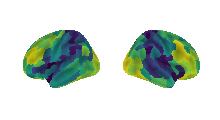

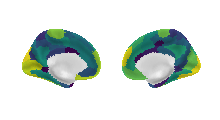

In [7]:
# rank data for plotting
plot_rank = True
if plot_rank:
    data = sp.stats.rankdata(ac)
    fig_label = 'ave_ctrb_rank_brainplot.png'
else:
    data = ac
    fig_label = 'ave_ctrb_brainplot.png'

# plot states on brain surface
lh_annot_file = '/Users/lindenmp/Google-Drive-Penn/work/research_projects/connectome_loader/data/schaefer_parc/fsaverage5' \
                '/lh.Schaefer2018_200Parcels_7Networks_order.annot'
rh_annot_file = '/Users/lindenmp/Google-Drive-Penn/work/research_projects/connectome_loader/data/schaefer_parc/fsaverage5' \
                '/rh.Schaefer2018_200Parcels_7Networks_order.annot'
fsaverage = datasets.fetch_surf_fsaverage(mesh='fsaverage5')
cmap = 'viridis'

vmax = np.max(data)
vmin = np.min(data)
print(vmin, vmax)

vtx_data_lh, _, _ = roi_to_vtx(data[:int(n_nodes/2)], lh_annot_file)
vtx_data_rh, _, _ = roi_to_vtx(data[int(n_nodes/2):], rh_annot_file)

f, ax = plt.subplots(1, 2, figsize=(2, 2), subplot_kw={'projection': '3d'})
plotting.plot_surf_roi(fsaverage['infl_left'], roi_map=vtx_data_lh,
                     hemi='left', view='lateral',
                     vmin=vmin, vmax=vmax,
                     bg_map=fsaverage['sulc_left'],
                     bg_on_data=True, axes=ax[0],
                     darkness=.5, cmap=cmap, colorbar=False)

plotting.plot_surf_roi(fsaverage['infl_right'], roi_map=vtx_data_rh,
                     hemi='right', view='lateral',
                     vmin=vmin, vmax=vmax,
                     bg_map=fsaverage['sulc_right'],
                     bg_on_data=True, axes=ax[1],
                     darkness=.5, cmap=cmap, colorbar=False)
f.tight_layout(pad=0)
f.savefig(os.path.join(resultsdir, '1_'+fig_label), dpi=600, bbox_inches='tight', pad_inches=0.01)
plotting.show()

f, ax = plt.subplots(1, 2, figsize=(2, 2), subplot_kw={'projection': '3d'})
plotting.plot_surf_roi(fsaverage['infl_left'], roi_map=vtx_data_lh,
                     hemi='left', view='medial',
                     vmin=vmin, vmax=vmax,
                     bg_map=fsaverage['sulc_left'],
                     bg_on_data=True, axes=ax[0],
                     darkness=.5, cmap=cmap, colorbar=False)

plotting.plot_surf_roi(fsaverage['infl_right'], roi_map=vtx_data_rh,
                     hemi='right', view='medial',
                     vmin=vmin, vmax=vmax,
                     bg_map=fsaverage['sulc_right'],
                     bg_on_data=True, axes=ax[1],
                     darkness=.5, cmap=cmap, colorbar=False)
f.tight_layout(pad=0)
f.savefig(os.path.join(resultsdir, '2_'+fig_label), dpi=600, bbox_inches='tight', pad_inches=0.01)
plotting.show()

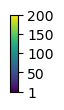

In [8]:
if plot_rank:
    cbar_tick_format='auto'
else:
    cbar_tick_format='%.3f'
f, ax = plt.subplots(figsize=(2, 2), subplot_kw={'projection': '3d'})
plotting.plot_surf_roi(fsaverage['infl_left'], roi_map=vtx_data_lh,
                     hemi='left', view='lateral',
                     vmin=vmin, vmax=vmax,
                     bg_map=fsaverage['sulc_left'],
                     bg_on_data=True, axes=ax,
                     darkness=.5, cmap=cmap, colorbar=True, cbar_tick_format=cbar_tick_format)
ax.set_visible(False)
f.savefig(os.path.join(resultsdir, 'colorbar.svg'), dpi=300, bbox_inches='tight', pad_inches=0.01)
plotting.show()
